# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lab

# Requirements

In [176]:
print("My variant: ", ord("M") % 3 + 1)

def get_col(filename: str, colname: str):
    return np.array(pd.read_csv(filename)[colname])

df = pd.read_csv('res/russia_losses_equipment.csv')
df = df.fillna(0)

My variant:  3


In [170]:
# Numpy array that contains all of the tank losses
APC_losses = get_col('res/russia_losses_equipment.csv', 'APC')

In [173]:
print("Daily APC losses:")
print(APC_losses[-1] / len(APC_losses))

daily_APC_losses = np.flip(np.copy(APC_losses))
for i in range(len(daily_APC_losses) - 1):
    daily_APC_losses[i] -= daily_APC_losses[i + 1]
    
daily_APC_losses = np.flip(np.copy(APC_losses))

print("Daily APC losses:")
print(daily_APC_losses)

Daily APC losses:
15.487719298245613
Daily APC losses:
[516 190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23
  30  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16
  25  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22
  24  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27
  28  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19
  22  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18
   8  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6
  10   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7
   6  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6
  19   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8
   5   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9
  33  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8
  20  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7 

In [174]:
print("5 max APC losses per day:")
print(sorted(daily_APC_losses)[-5:])

5 max APC losses per day:
[60, 96, 110, 190, 516]


In [120]:
print('APC losses in summer 2023:')
print(
    int(df[df['date'] == '2023-08-31']['APC'].values) - 
    int(df[df['date'] == '2023-06-01']['APC'].values)
)

APC losses in summer 2023:
1126


In [179]:
print('Mean value of losses throughout 100-500 days of war:')
print(sum(daily_APC_losses[100:501]) / 400)

Mean value of losses throughout 100-500 days of war:
11.4675


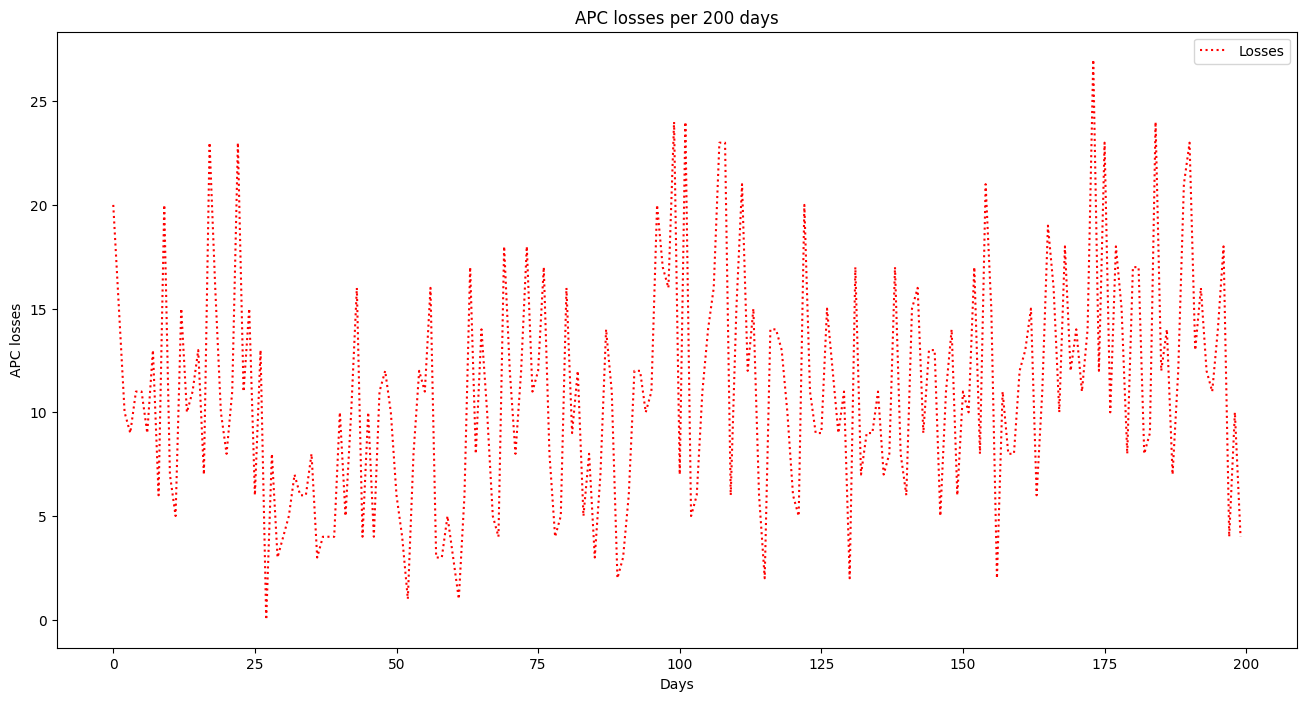

In [194]:
# plt.subplots(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.plot(
    np.arange(200),
    daily_APC_losses[-200:], linestyle="dotted", color="red"
)

plt.legend(["Losses"])
plt.title("APC losses per 200 days")
plt.xlabel("Days")
plt.ylabel("APC losses")

plt.savefig('plot_APC.png', dpi=100)
plt.show()
plt.close()